In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-04-05 14:27:07.371123: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 14:27:07.371333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 14:27:07.567482: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

train = train.drop(['PassengerId', 'Name'],axis=1)
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [4]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: xlabel='Transported'>

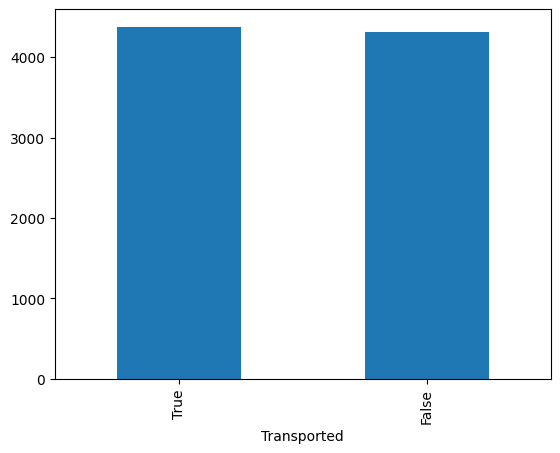

In [5]:
plot_df = train['Transported'].value_counts()
plot_df.plot(kind="bar")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

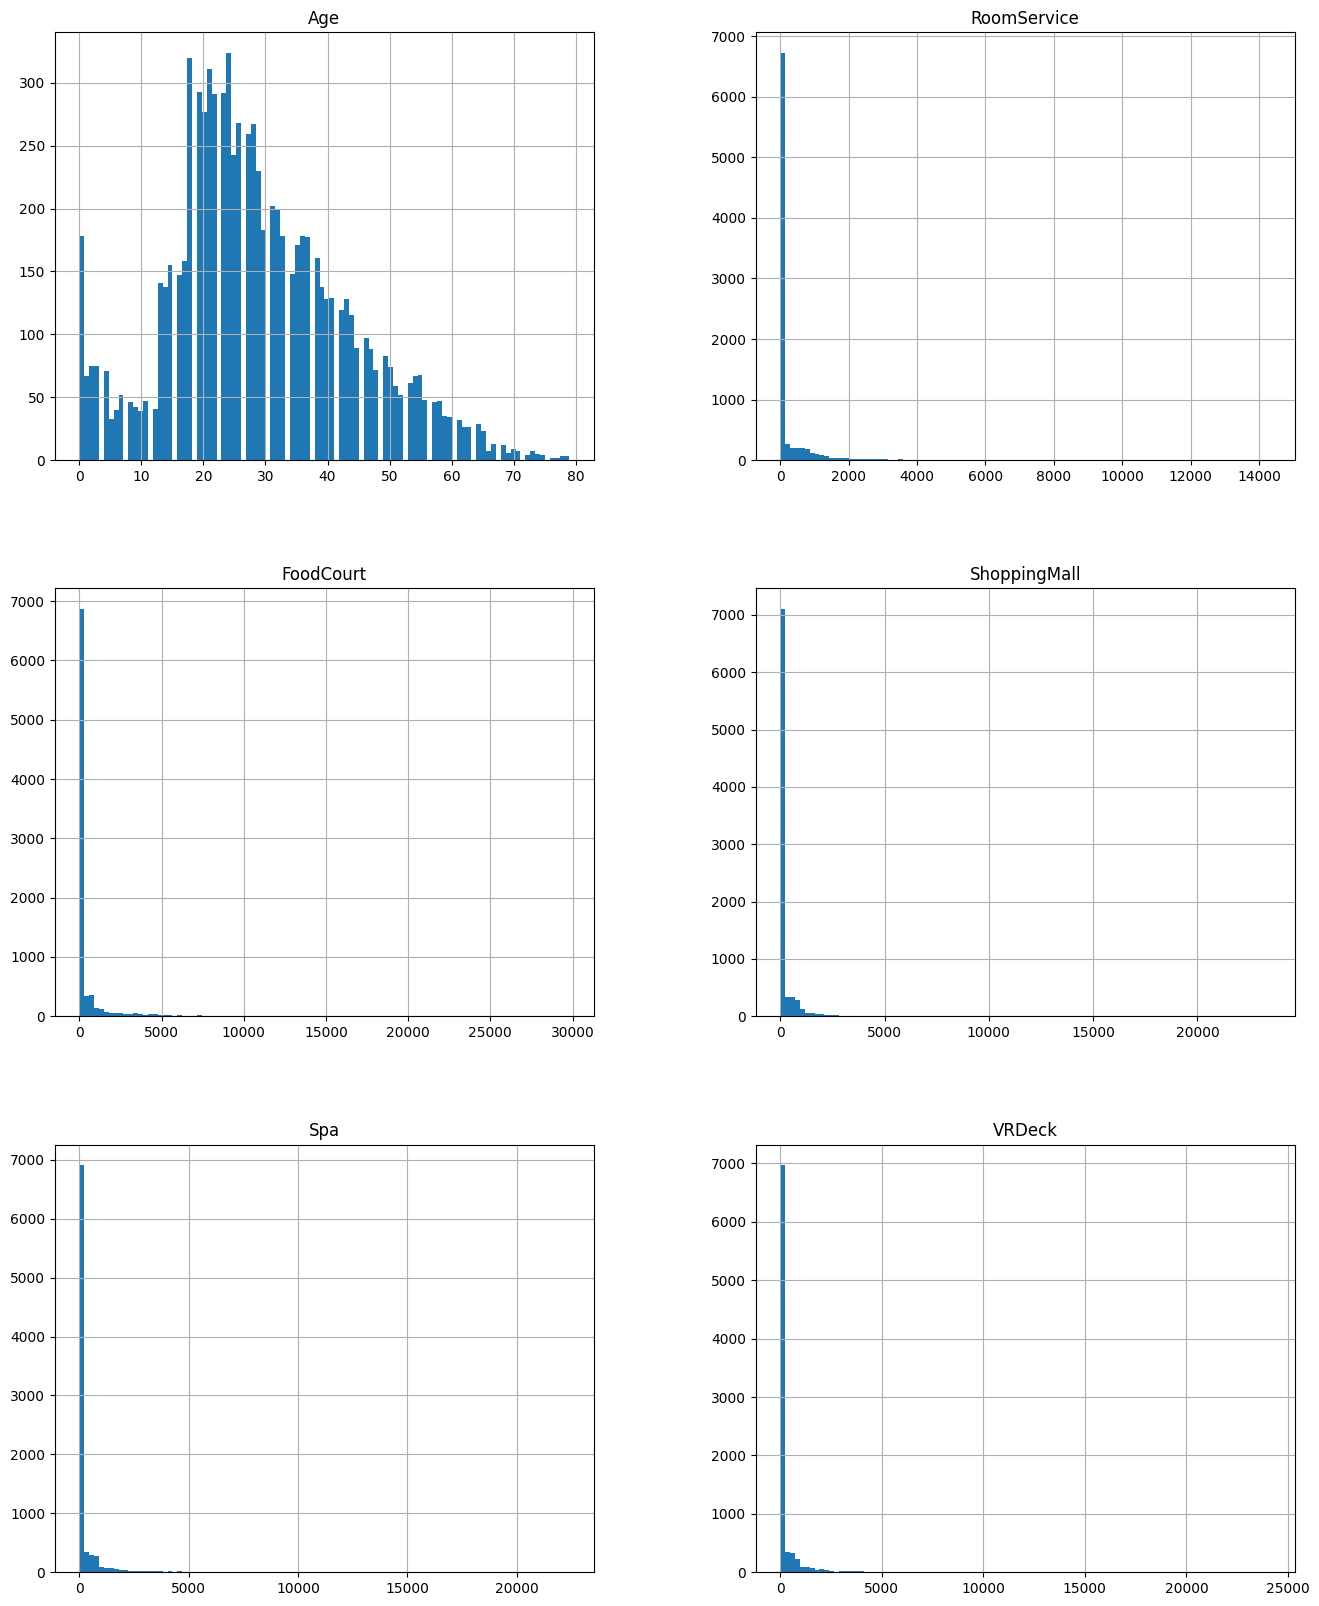

In [6]:
train.select_dtypes(include= ['float64','int64']).hist(figsize=(16,20), bins=100, xlabelsize=10, ylabelsize=10)

In [7]:
dataset = train[["Age",'VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', "Transported"]]
dataset


,Age,VIP,CryoSleep,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,False,False,0.0,0.0,0.0,0.0,False
1,24.0,False,False,9.0,25.0,549.0,44.0,True
2,58.0,True,False,3576.0,0.0,6715.0,49.0,False
3,33.0,False,False,1283.0,371.0,3329.0,193.0,False
4,16.0,False,False,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...
8688,41.0,True,False,6819.0,0.0,1643.0,74.0,False
8689,18.0,False,True,0.0,0.0,0.0,0.0,False
8690,26.0,False,False,0.0,1872.0,1.0,0.0,True
8691,32.0,False,False,1049.0,0.0,353.0,3235.0,False


In [8]:
dataset.isnull().sum().sort_values(ascending=False)


CryoSleep       217
ShoppingMall    208
VIP             203
VRDeck          188
FoodCourt       183
Spa             183
Age             179
Transported       0
dtype: int64

# Dropna

In [9]:
dataset = dataset.dropna()
dataset.isnull().sum().sort_values(ascending=False)

Age             0
VIP             0
CryoSleep       0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [10]:
label = "Transported"
for i in [label, "VIP", "CryoSleep"]:
    dataset[i] = dataset[i].astype(int)
    
dataset

/tmp/ipykernel_33/2700763721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = dataset[i].astype(int)
/tmp/ipykernel_33/2700763721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = dataset[i].astype(int)
/tmp/ipykernel_33/2700763721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,Age,VIP,CryoSleep,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0,0,0.0,0.0,0.0,0.0,0
1,24.0,0,0,9.0,25.0,549.0,44.0,1
2,58.0,1,0,3576.0,0.0,6715.0,49.0,0
3,33.0,0,0,1283.0,371.0,3329.0,193.0,0
4,16.0,0,0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...
8688,41.0,1,0,6819.0,0.0,1643.0,74.0,0
8689,18.0,0,1,0.0,0.0,0.0,0.0,0
8690,26.0,0,0,0.0,1872.0,1.0,0.0,1
8691,32.0,0,0,1049.0,0.0,353.0,3235.0,0


In [11]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset)

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

In [12]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [13]:
model = tfdf.keras.RandomForestModel()
model.compile(metrics=["accuracy"])  

Use /tmp/tmp7vvh7tm3 as temporary training directory


In [14]:
model.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:06.044154. Found 5901 examples.
Training model...


[INFO 24-04-05 14:27:34.9633 UTC kernel.cc:1233] Loading model from path /tmp/tmp7vvh7tm3/model/ with prefix f37ec8d8f6bc493d


Model trained in 0:00:02.701567
Compiling model...


[INFO 24-04-05 14:27:35.7163 UTC decision_forest.cc:660] Model loaded with 300 root(s), 188124 node(s), and 7 input feature(s).
[INFO 24-04-05 14:27:35.7164 UTC abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-04-05 14:27:35.7164 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


In [15]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

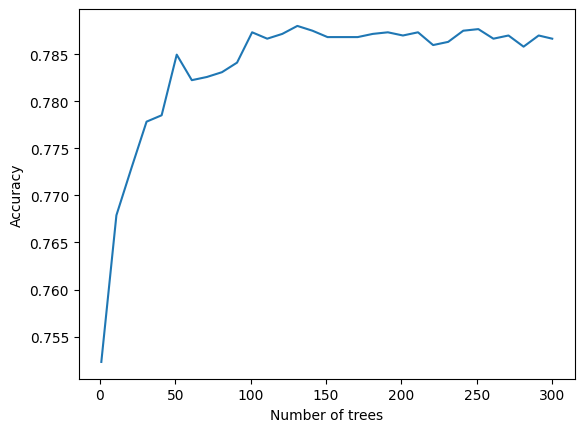

In [16]:
def plot_Accuracy(model):
    logs = model.make_inspector().training_logs()
    plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy")
    plt.show()
    
plot_Accuracy(model)

In [20]:
# model evaluation
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=5901, accuracy=0.7866463311303169, loss=2.499388444694234, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [22]:
inspector.variable_importances()

{'NUM_AS_ROOT': [("CryoSleep" (1; #1), 171.0),
  ("Spa" (1; #4), 80.0),
  ("VRDeck" (1; #6), 32.0),
  ("ShoppingMall" (1; #3), 16.0),
  ("FoodCourt" (1; #2), 1.0)],
 'INV_MEAN_MIN_DEPTH': [("CryoSleep" (1; #1), 0.27899239170174284),
  ("Spa" (1; #4), 0.2710693776081232),
  ("FoodCourt" (1; #2), 0.20487114286336827),
  ("Age" (1; #0), 0.18236201875116834),
  ("VRDeck" (1; #6), 0.17694721815917602),
  ("ShoppingMall" (1; #3), 0.1527722043009442),
  ("VIP" (1; #5), 0.08914543785803623)],
 'NUM_NODES': [("Age" (1; #0), 38141.0),
  ("FoodCourt" (1; #2), 14173.0),
  ("ShoppingMall" (1; #3), 14171.0),
  ("VRDeck" (1; #6), 13301.0),
  ("Spa" (1; #4), 13232.0),
  ("VIP" (1; #5), 594.0),
  ("CryoSleep" (1; #1), 300.0)],
 'SUM_SCORE': [("CryoSleep" (1; #1), 154500.09904467128),
  ("Spa" (1; #4), 120910.31264744513),
  ("FoodCourt" (1; #2), 109160.24898361764),
  ("Age" (1; #0), 104019.85063001045),
  ("VRDeck" (1; #6), 94659.36055823899),
  ("ShoppingMall" (1; #3), 86541.3006719636),
  ("VIP" (1;

In [23]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #1), 171.0),
 ("Spa" (1; #4), 80.0),
 ("VRDeck" (1; #6), 32.0),
 ("ShoppingMall" (1; #3), 16.0),
 ("FoodCourt" (1; #2), 1.0)]

# Prediction and Submission

In [24]:
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission_id = test_df["PassengerId"]
test_df = test_df[['Age','VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

test_df = test_df.fillna(value=0)

for i in ["VIP", "CryoSleep"]:
    test_df[i] = test_df[i].astype(int)
    
    
test_df = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

# Get the predictions for testdata
pred = model.predict(test_df)
bool_pred = (pred > 0.5).astype(bool)
bool_pred


5/5 [==============================] - 0s 28ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [25]:
submission_df = pd.DataFrame({'PassengerId': submission_id,
                              'Transported': bool_pred.squeeze()})

In [26]:
submission_df.to_csv('submission.csv', index=False)

In [27]:
submission_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


# Best Score
BEST SCORE
0.77764 V2